In [1]:
# imports 
import numpy as np
from math import sqrt 
from pprint import pprint
from numpy import array
from scipy.io import arff
import pandas as pd
from time import time

In [2]:
# load data

df=pd.read_csv('Annthyroid_02_v01.csv')  

del df['id']
del df['Unnamed: 0']
df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)

df.head()

att1  att2  att3  att4  att5  att6  att7  att8  att9  att10   ...     \
0  0.73   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   ...      
1  0.24   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   ...      
2  0.47   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   ...      
3  0.64   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   ...      
4  0.23   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   ...      

   att13  att14  att15  att16    att17  att18  att19  att20  att21  outlier  
0    0.0    0.0    0.0    0.0  0.00060  0.015  0.120  0.082  0.146        0  
1    0.0    0.0    0.0    0.0  0.00025  0.030  0.143  0.133  0.108        0  
2    0.0    0.0    0.0    0.0  0.00190  0.024  0.102  0.131  0.078        0  
3    0.0    0.0    0.0    0.0  0.00090  0.017  0.077  0.090  0.085        0  
4    0.0    0.0    0.0    0.0  0.00025  0.026  0.139  0.090  0.153        0  

[5 rows x 22 columns]

In [3]:
df.shape

(6802, 22)

In [4]:
# data to values
df = df.values

In [5]:
# Extratrees Deep
import argparse
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/Annthyroid.json")
gc = GCForest(config)

In [6]:
# train test 
from sklearn.cross_validation import train_test_split
y = df[:,21]
X = df[:,0:21]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# number of class
len(np.unique(y_train))

2

In [8]:
         # X_enc is the concatenated predict_proba result of DeepDeepExtraTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
   

[ 2018-07-27 20:29:29,883][cascade_classifier.fit_transform] X_groups_train.shape=[(4557, 21)],y_train.shape=(4557,),X_groups_test.shape=[(2245, 21)],y_test.shape=(2245,)
[ 2018-07-27 20:29:29,884][cascade_classifier.fit_transform] group_dims=[21]
[ 2018-07-27 20:29:29,886][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:29:29,887][cascade_classifier.fit_transform] group_ends=[21]
[ 2018-07-27 20:29:29,888][cascade_classifier.fit_transform] X_train.shape=(4557, 21),X_test.shape=(2245, 21)
[ 2018-07-27 20:29:29,890][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(4557, 21), X_cur_test.shape=(2245, 21)
[ 2018-07-27 20:29:30,425][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.25%
[ 2018-07-27 20:29:31,144][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.56%
[ 2018-07-27 20:29:31,899][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

In [9]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-27 20:29:37,320][cascade_classifier.transform] X_groups_test.shape=[(2245, 21)]
[ 2018-07-27 20:29:37,322][cascade_classifier.transform] group_dims=[21]
[ 2018-07-27 20:29:37,324][cascade_classifier.transform] X_test.shape=(2245, 21)
[ 2018-07-27 20:29:37,325][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(2245, 21)


Test Accuracy of DeepExtraTrees = 98.841871 %
[[2194    3]
 [  23   25]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      2197
        1.0       0.89      0.52      0.66        48

avg / total       0.99      0.99      0.99      2245



In [10]:
# Make data + estimators
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-27 20:29:39,593][cascade_classifier.transform] X_groups_test.shape=[(2245, 21)]
[ 2018-07-27 20:29:39,595][cascade_classifier.transform] group_dims=[21]
[ 2018-07-27 20:29:39,597][cascade_classifier.transform] X_test.shape=(2245, 21)
[ 2018-07-27 20:29:39,599][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(2245, 21)


In [11]:
# New data
X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-27 20:29:41,933][cascade_classifier.fit_transform] X_groups_train.shape=[(4557, 23)],y_train.shape=(4557,),X_groups_test.shape=[(2245, 23)],y_test.shape=(2245,)
[ 2018-07-27 20:29:41,936][cascade_classifier.fit_transform] group_dims=[23]
[ 2018-07-27 20:29:41,938][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:29:41,939][cascade_classifier.fit_transform] group_ends=[23]
[ 2018-07-27 20:29:41,940][cascade_classifier.fit_transform] X_train.shape=(4557, 23),X_test.shape=(2245, 23)
[ 2018-07-27 20:29:41,942][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(4557, 23), X_cur_test.shape=(2245, 23)
[ 2018-07-27 20:29:42,810][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.68%
[ 2018-07-27 20:29:43,912][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.56%
[ 2018-07-27 20:29:44,917][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

In [12]:
# predict  data + Es
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-27 20:29:50,214][cascade_classifier.transform] X_groups_test.shape=[(2245, 23)]
[ 2018-07-27 20:29:50,215][cascade_classifier.transform] group_dims=[23]
[ 2018-07-27 20:29:50,217][cascade_classifier.transform] X_test.shape=(2245, 23)
[ 2018-07-27 20:29:50,218][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(2245, 23)


Test Accuracy of DeepExtraTrees = 99.109131 %
[[2188    9]
 [  11   37]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.80      0.77      0.79        48

avg / total       0.99      0.99      0.99      2245



In [13]:
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")


[ 2018-07-27 20:29:51,888][cascade_classifier.fit_transform] X_groups_train.shape=[(4557, 23)],y_train.shape=(4557,),X_groups_test.shape=[(2245, 23)],y_test.shape=(2245,)
[ 2018-07-27 20:29:51,889][cascade_classifier.fit_transform] group_dims=[23]
[ 2018-07-27 20:29:51,891][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 20:29:51,891][cascade_classifier.fit_transform] group_ends=[23]
[ 2018-07-27 20:29:51,892][cascade_classifier.fit_transform] X_train.shape=(4557, 23),X_test.shape=(2245, 23)
[ 2018-07-27 20:29:51,894][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(4557, 23), X_cur_test.shape=(2245, 23)
[ 2018-07-27 20:29:52,396][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.68%
[ 2018-07-27 20:29:53,003][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.56%
[ 2018-07-27 20:29:53,720][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

('Test Accuracy of DeepExtratTrees = 99.109131 %', 'Layer :', 0)
[[2189    8]
 [  12   36]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.82      0.75      0.78        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '8.132', ' seconds')


[ 2018-07-27 20:30:03,208][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.68%
[ 2018-07-27 20:30:04,133][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.56%
[ 2018-07-27 20:30:04,849][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.34%
[ 2018-07-27 20:30:05,681][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.12%
[ 2018-07-27 20:30:06,400][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.68%
[ 2018-07-27 20:30:07,121][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.46%
[ 2018-07-27 20:30:07,841][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.68%
[ 2018-07-27 20:30:08,444][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.56%


('Test Accuracy of DeepExtratTrees = 98.975501 %', 'Layer :', 1)
[[2187   10]
 [  13   35]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      2197
        1.0       0.78      0.73      0.75        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '7.562', ' seconds')


[ 2018-07-27 20:30:12,010][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.46%
[ 2018-07-27 20:30:12,613][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.34%
[ 2018-07-27 20:30:13,463][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.34%
[ 2018-07-27 20:30:14,067][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.12%
[ 2018-07-27 20:30:14,784][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.68%
[ 2018-07-27 20:30:15,498][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.25%
[ 2018-07-27 20:30:16,215][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.90%
[ 2018-07-27 20:30:16,815][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.12%


('Test Accuracy of DeepExtratTrees = 99.064588 %', 'Layer :', 2)
[[2189    8]
 [  13   35]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.81      0.73      0.77        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '6.864', ' seconds')


[ 2018-07-27 20:30:21,522][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.68%
[ 2018-07-27 20:30:22,328][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.34%
[ 2018-07-27 20:30:23,062][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.12%
[ 2018-07-27 20:30:23,786][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.34%
[ 2018-07-27 20:30:24,545][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.46%
[ 2018-07-27 20:30:25,384][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.46%
[ 2018-07-27 20:30:26,126][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.90%
[ 2018-07-27 20:30:26,843][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.34%


('Test Accuracy of DeepExtratTrees = 99.153675 %', 'Layer :', 3)
[[2191    6]
 [  13   35]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.85      0.73      0.79        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '7.8', ' seconds')


[ 2018-07-27 20:30:30,642][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.68%
[ 2018-07-27 20:30:31,356][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.34%
[ 2018-07-27 20:30:31,967][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.12%
[ 2018-07-27 20:30:32,576][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.34%
[ 2018-07-27 20:30:33,292][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.46%
[ 2018-07-27 20:30:34,011][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.68%
[ 2018-07-27 20:30:34,613][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.12%
[ 2018-07-27 20:30:35,328][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.12%


('Test Accuracy of DeepExtratTrees = 99.153675 %', 'Layer :', 4)
[[2191    6]
 [  13   35]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.85      0.73      0.79        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '7.025', ' seconds')


[ 2018-07-27 20:30:40,264][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.68%
[ 2018-07-27 20:30:41,271][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.34%
[ 2018-07-27 20:30:42,003][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.12%
[ 2018-07-27 20:30:42,726][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.12%
[ 2018-07-27 20:30:43,328][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.68%
[ 2018-07-27 20:30:44,050][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.68%
[ 2018-07-27 20:30:44,656][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.12%
[ 2018-07-27 20:30:45,258][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.12%


('Test Accuracy of DeepExtratTrees = 99.153675 %', 'Layer :', 5)
[[2190    7]
 [  12   36]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.84      0.75      0.79        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '7.53', ' seconds')


[ 2018-07-27 20:30:49,204][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.46%
[ 2018-07-27 20:30:49,921][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.34%
[ 2018-07-27 20:30:50,752][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.34%
[ 2018-07-27 20:30:51,469][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.12%
[ 2018-07-27 20:30:52,070][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.46%
[ 2018-07-27 20:30:52,789][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.68%
[ 2018-07-27 20:30:53,505][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.12%
[ 2018-07-27 20:30:54,109][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.90%


('Test Accuracy of DeepExtratTrees = 99.198218 %', 'Layer :', 6)
[[2191    6]
 [  12   36]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.86      0.75      0.80        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '7.005', ' seconds')


[ 2018-07-27 20:30:58,531][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.46%
[ 2018-07-27 20:30:59,471][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.12%
[ 2018-07-27 20:31:00,240][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.56%
[ 2018-07-27 20:31:00,958][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.12%
[ 2018-07-27 20:31:01,708][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.46%
[ 2018-07-27 20:31:02,312][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.68%
[ 2018-07-27 20:31:03,027][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.90%
[ 2018-07-27 20:31:03,740][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.12%


('Test Accuracy of DeepExtratTrees = 99.198218 %', 'Layer :', 7)
[[2191    6]
 [  12   36]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.86      0.75      0.80        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '7.235', ' seconds')


[ 2018-07-27 20:31:07,534][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.68%
[ 2018-07-27 20:31:08,140][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.12%
[ 2018-07-27 20:31:08,861][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.34%
[ 2018-07-27 20:31:09,472][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.12%
[ 2018-07-27 20:31:10,074][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.68%
[ 2018-07-27 20:31:10,677][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.90%
[ 2018-07-27 20:31:11,394][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.12%
[ 2018-07-27 20:31:12,113][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.12%


('Test Accuracy of DeepExtratTrees = 99.153675 %', 'Layer :', 8)
[[2192    5]
 [  14   34]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.87      0.71      0.78        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '6.677', ' seconds')


[ 2018-07-27 20:31:15,863][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.46%
[ 2018-07-27 20:31:16,900][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.34%
[ 2018-07-27 20:31:17,909][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.34%
[ 2018-07-27 20:31:18,774][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.12%
[ 2018-07-27 20:31:19,491][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.68%
[ 2018-07-27 20:31:20,096][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.68%
[ 2018-07-27 20:31:20,697][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.90%
[ 2018-07-27 20:31:21,298][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.68%


('Test Accuracy of DeepExtratTrees = 99.109131 %', 'Layer :', 9)
[[2191    6]
 [  14   34]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.85      0.71      0.77        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '7.494', ' seconds')


[ 2018-07-27 20:31:25,093][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.68%
[ 2018-07-27 20:31:25,962][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.12%
[ 2018-07-27 20:31:26,691][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.12%
[ 2018-07-27 20:31:27,291][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.12%
[ 2018-07-27 20:31:28,007][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.03%
[ 2018-07-27 20:31:28,612][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.68%
[ 2018-07-27 20:31:29,331][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.90%
[ 2018-07-27 20:31:29,934][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.68%


('Test Accuracy of DeepExtratTrees = 99.020045 %', 'Layer :', 10)
[[2187   10]
 [  12   36]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      2197
        1.0       0.78      0.75      0.77        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '7.011', ' seconds')


[ 2018-07-27 20:31:33,753][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.46%
[ 2018-07-27 20:31:34,615][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.34%
[ 2018-07-27 20:31:35,516][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.68%
[ 2018-07-27 20:31:36,704][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.34%
[ 2018-07-27 20:31:37,691][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.68%
[ 2018-07-27 20:31:38,412][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.68%
[ 2018-07-27 20:31:39,019][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.12%
[ 2018-07-27 20:31:39,738][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.12%


('Test Accuracy of DeepExtratTrees = 99.242762 %', 'Layer :', 11)
[[2188    9]
 [   8   40]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2197
        1.0       0.82      0.83      0.82        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '8.168', ' seconds')


[ 2018-07-27 20:31:43,896][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.68%
[ 2018-07-27 20:31:44,616][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.34%
[ 2018-07-27 20:31:45,332][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.90%
[ 2018-07-27 20:31:46,050][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.34%
[ 2018-07-27 20:31:46,648][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.68%
[ 2018-07-27 20:31:47,249][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.90%
[ 2018-07-27 20:31:47,966][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.68%
[ 2018-07-27 20:31:48,682][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.12%


('Test Accuracy of DeepExtratTrees = 99.153675 %', 'Layer :', 12)
[[2187   10]
 [   9   39]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2197
        1.0       0.80      0.81      0.80        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '6.766', ' seconds')


[ 2018-07-27 20:31:52,415][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.68%
[ 2018-07-27 20:31:53,425][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.34%
[ 2018-07-27 20:31:54,311][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.12%
[ 2018-07-27 20:31:55,374][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.34%
[ 2018-07-27 20:31:56,137][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.68%
[ 2018-07-27 20:31:56,742][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.90%
[ 2018-07-27 20:31:57,460][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.68%
[ 2018-07-27 20:31:58,180][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.90%


('Test Accuracy of DeepExtratTrees = 99.242762 %', 'Layer :', 13)
[[2189    8]
 [   9   39]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2197
        1.0       0.83      0.81      0.82        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '8.077', ' seconds')


[ 2018-07-27 20:32:02,381][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.46%
[ 2018-07-27 20:32:03,239][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.34%
[ 2018-07-27 20:32:03,967][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.34%
[ 2018-07-27 20:32:04,693][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.12%
[ 2018-07-27 20:32:05,565][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.68%
[ 2018-07-27 20:32:06,408][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.68%
[ 2018-07-27 20:32:07,127][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.68%
[ 2018-07-27 20:32:07,855][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.68%


('Test Accuracy of DeepExtratTrees = 99.109131 %', 'Layer :', 14)
[[2188    9]
 [  11   37]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.80      0.77      0.79        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '7.672', ' seconds')


[ 2018-07-27 20:32:12,494][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.25%
[ 2018-07-27 20:32:13,497][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.12%
[ 2018-07-27 20:32:14,444][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.34%
[ 2018-07-27 20:32:15,299][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.68%
[ 2018-07-27 20:32:16,429][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.25%
[ 2018-07-27 20:32:17,248][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.90%
[ 2018-07-27 20:32:18,123][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.90%
[ 2018-07-27 20:32:18,889][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.90%


('Test Accuracy of DeepExtratTrees = 99.376392 %', 'Layer :', 15)
[[2193    4]
 [  10   38]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2197
        1.0       0.90      0.79      0.84        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '8.626', ' seconds')


[ 2018-07-27 20:32:23,158][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.68%
[ 2018-07-27 20:32:23,876][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.12%
[ 2018-07-27 20:32:24,596][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.34%
[ 2018-07-27 20:32:25,315][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.68%
[ 2018-07-27 20:32:26,153][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.25%
[ 2018-07-27 20:32:26,878][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.90%
[ 2018-07-27 20:32:27,596][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.12%
[ 2018-07-27 20:32:28,204][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.46%


('Test Accuracy of DeepExtratTrees = 99.153675 %', 'Layer :', 16)
[[2190    7]
 [  12   36]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.84      0.75      0.79        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '7.104', ' seconds')


[ 2018-07-27 20:32:32,339][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.46%
[ 2018-07-27 20:32:32,946][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.90%
[ 2018-07-27 20:32:33,664][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.12%
[ 2018-07-27 20:32:34,380][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.68%
[ 2018-07-27 20:32:35,097][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.68%
[ 2018-07-27 20:32:35,818][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.12%
[ 2018-07-27 20:32:36,662][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.90%
[ 2018-07-27 20:32:37,507][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.46%


('Test Accuracy of DeepExtratTrees = 99.287305 %', 'Layer :', 17)
[[2192    5]
 [  11   37]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2197
        1.0       0.88      0.77      0.82        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '7.346', ' seconds')


[ 2018-07-27 20:32:42,144][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.46%
[ 2018-07-27 20:32:43,302][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.12%
[ 2018-07-27 20:32:44,440][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.12%
[ 2018-07-27 20:32:45,572][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.68%
[ 2018-07-27 20:32:46,323][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.68%
[ 2018-07-27 20:32:46,929][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.46%
[ 2018-07-27 20:32:47,768][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.90%
[ 2018-07-27 20:32:48,374][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.46%


('Test Accuracy of DeepExtratTrees = 99.287305 %', 'Layer :', 18)
[[2192    5]
 [  11   37]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2197
        1.0       0.88      0.77      0.82        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '8.498', ' seconds')


[ 2018-07-27 20:32:52,169][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.25%
[ 2018-07-27 20:32:52,887][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.90%
[ 2018-07-27 20:32:53,492][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.12%
[ 2018-07-27 20:32:54,214][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.68%
[ 2018-07-27 20:32:54,936][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.46%
[ 2018-07-27 20:32:55,535][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.90%
[ 2018-07-27 20:32:56,253][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.68%
[ 2018-07-27 20:32:57,005][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.68%


('Test Accuracy of DeepExtratTrees = 99.198218 %', 'Layer :', 19)
[[2192    5]
 [  13   35]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2197
        1.0       0.88      0.73      0.80        48

avg / total       0.99      0.99      0.99      2245

(' Time ', '7.007', ' seconds')


('Opt_layer_num =', 15, ' Accuracy =', 99.38, 'Time =', 119.65000000000001)


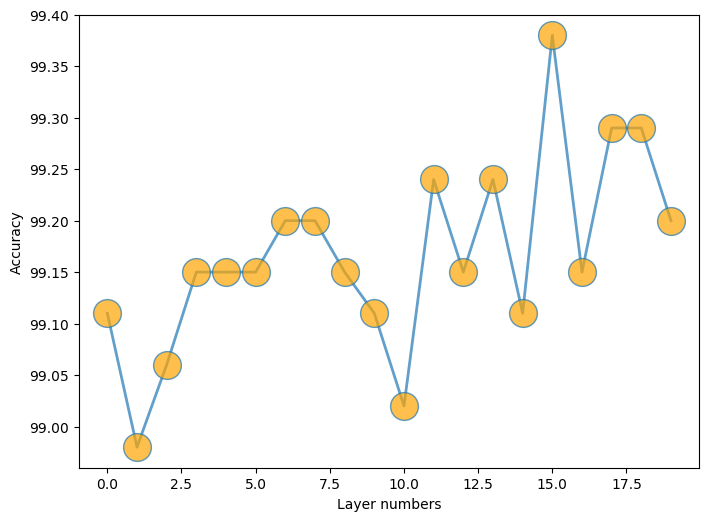

In [14]:
print ("Opt_layer_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Layer numbers')
plt.show()

In [15]:
Accuracy

[99.11,
 98.98,
 99.06,
 99.15,
 99.15,
 99.15,
 99.2,
 99.2,
 99.15,
 99.11,
 99.02,
 99.24,
 99.15,
 99.24,
 99.11,
 99.38,
 99.15,
 99.29,
 99.29,
 99.2]